In [50]:
import pandas as pd
import numpy as np
import spotipy
import spotipy.util as util
import matplotlib
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns




sns.set_context("talk", font_scale=1)
sns.set_style("darkgrid")
sns.set_palette('tab10')
sns.set_color_codes()

In [18]:
music_df = pd.read_json('StreamingHistory0.json')
df2 = pd.read_json('StreamingHistory1.json')
df3 = pd.read_json('StreamingHistory2.json')
df4 = pd.read_json('StreamingHistory3.json')
df5 = pd.read_json('StreamingHistory4.json')
music_df = pd.concat([music_df, df2, df3, df4, df5])

In [19]:
music_df.head(10)
#df.tail(10)
#df.info()

,endTime,artistName,trackName,msPlayed
0,2022-09-22 16:28,Death Cab for Cutie,Transatlanticism,244250
1,2022-11-02 00:02,Alan Walker,Faded,212626
2,2022-11-02 00:03,Alan Walker,Faded,52928
3,2022-11-02 00:14,The Floating Mind,Brown Noise (200 Hz),12695
4,2022-11-02 00:14,Justin Warnick,Stranger,157499
5,2022-11-02 00:16,Weekend,Coma Summer,11754
6,2022-11-02 00:16,Two Feet,Your Mother Was Cheaper,3249
7,2022-11-02 00:16,King Krule,363N63,121292
8,2022-11-02 00:16,John Mayer,Waiting On the World to Change,2474
9,2022-11-02 00:20,Jeff Rosenstock,We Begged 2 Explode,224149


In [22]:
music_df['endTime']=pd.to_datetime(music_df['endTime'])
music_df['minPlayed']=(df['msPlayed']/1000/60)
music_df.drop('msPlayed', axis=1, inplace=True)

KeyError: "['msPlayed'] not found in axis"

In [23]:
music_df.head()

,endTime,artistName,trackName,minPlayed
0,2022-09-22 16:28:00,Death Cab for Cutie,Transatlanticism,4.070833
1,2022-11-02 00:02:00,Alan Walker,Faded,3.543767
2,2022-11-02 00:03:00,Alan Walker,Faded,0.882133
3,2022-11-02 00:14:00,The Floating Mind,Brown Noise (200 Hz),0.211583
4,2022-11-02 00:14:00,Justin Warnick,Stranger,2.624983


In [26]:
music_df.tail()

,endTime,artistName,trackName,minPlayed,dayOfWeek,dayOfMonth,timeOfDay,date
6272,2023-11-02 21:38:00,The War On Drugs,Nothing to Find,3.724133,Thursday,2,21,2023-11-02
6273,2023-11-02 22:16:00,James Blake,CMYK,3.654583,Thursday,2,22,2023-11-02
6274,2023-11-02 22:17:00,Burial,Kindred,0.125867,Thursday,2,22,2023-11-02
6275,2023-11-02 22:22:00,Burial,Ashtray wasp,5.185067,Thursday,2,22,2023-11-02
6276,2023-11-02 23:04:00,Burial,Near Dark,0.009233,Thursday,2,23,2023-11-02


In [24]:
music_df['dayOfWeek']=music_df['endTime'].dt.day_name()
music_df['dayOfMonth']=music_df['endTime'].dt.day
music_df['timeOfDay']=music_df['endTime'].dt.hour
music_df['date']=music_df['endTime'].dt.date

In [25]:
music_df.head()

,endTime,artistName,trackName,minPlayed,dayOfWeek,dayOfMonth,timeOfDay,date
0,2022-09-22 16:28:00,Death Cab for Cutie,Transatlanticism,4.070833,Thursday,22,16,2022-09-22
1,2022-11-02 00:02:00,Alan Walker,Faded,3.543767,Wednesday,2,0,2022-11-02
2,2022-11-02 00:03:00,Alan Walker,Faded,0.882133,Wednesday,2,0,2022-11-02
3,2022-11-02 00:14:00,The Floating Mind,Brown Noise (200 Hz),0.211583,Wednesday,2,0,2022-11-02
4,2022-11-02 00:14:00,Justin Warnick,Stranger,2.624983,Wednesday,2,0,2022-11-02


In [28]:
print("I listened to {} songs, {:.3f} per day in the last year (crazy!)".format( len(music_df), len(music_df)/365))

I listened to 46277 songs, 126.786 per day in the last year (crazy!)


In [31]:
print("This amounts to about {} hours total, and {:.3f} hours per day.".format(music_df.minPlayed.sum()/60, music_df.minPlayed.sum()/365/60))

This amounts to about 2228.3570124999997 hours total, and 6.105 hours per day.


In [32]:
print("which then equates to about {:.3f} minutes per song.".format(music_df.minPlayed.sum()/len(music_df)))

which then equates to about 2.889 minutes per song.


/tmp/ipykernel_468/1634927987.py:1: FutureWarning: The provided callable <function sum at 0x7f28d0340ea0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  timevsweek = music_df.pivot_table(columns='timeOfDay', index='dayOfWeek',


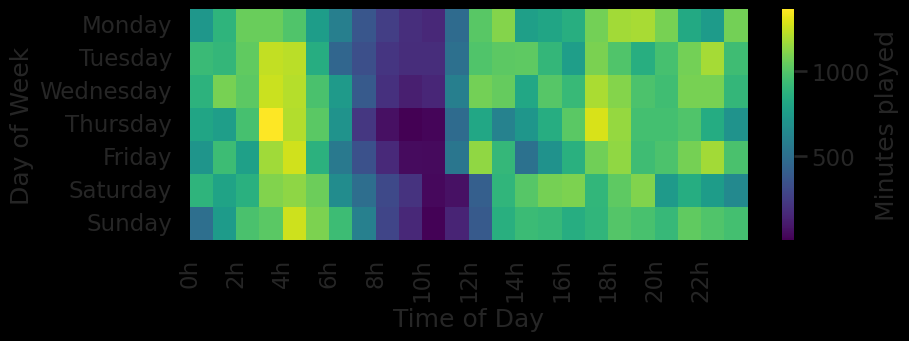

In [56]:
timevsweek = music_df.pivot_table(columns='timeOfDay', index='dayOfWeek', 
                                    values='minPlayed', aggfunc=np.sum).fillna(0)
#week days were scrambled
timevsweek = timevsweek.iloc[[1,5,6,4,0,2,3],:]
fig = plt.figure(figsize=(9,3))
ax = sns.heatmap(timevsweek, cmap='viridis',
                 cbar_kws=dict(label='Minutes played'))

xticks = np.arange(24)
xticklabels = [str(i) + 'h' for i in xticks]
ax.set_xticks(xticks[::2])
ax.set_xticklabels(xticklabels[::2])
ax.tick_params('x',rotation=90)

ax.set_xlabel('Time of Day')
ax.set_ylabel('Day of Week')
fig.patch.set_facecolor('black')
plt.show()